In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Data Analytics/Movies/movies.csv"

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [ ]:
df=pd.read_csv(file_path)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

  #look for missing value

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df['budget'] = df['budget'].fillna(0).astype('int64')

df['gross'] = df['gross'].fillna(0).astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [ ]:
df['released'] = df['released'].astype(str)
df['year corrected'] = df['released'].str.extract(r'(\b\d{4}\b)')
df['year corrected'] = pd.to_numeric(df['year corrected'], errors='coerce')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020.0


In [ ]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990.0


In [ ]:
pd.set_option('display.max_rows',None)

In [26]:
df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980.0
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980.0
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980.0
3,286,4,4,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980.0
4,1027,6,4,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980.0


<function matplotlib.pyplot.show(close=None, block=None)>

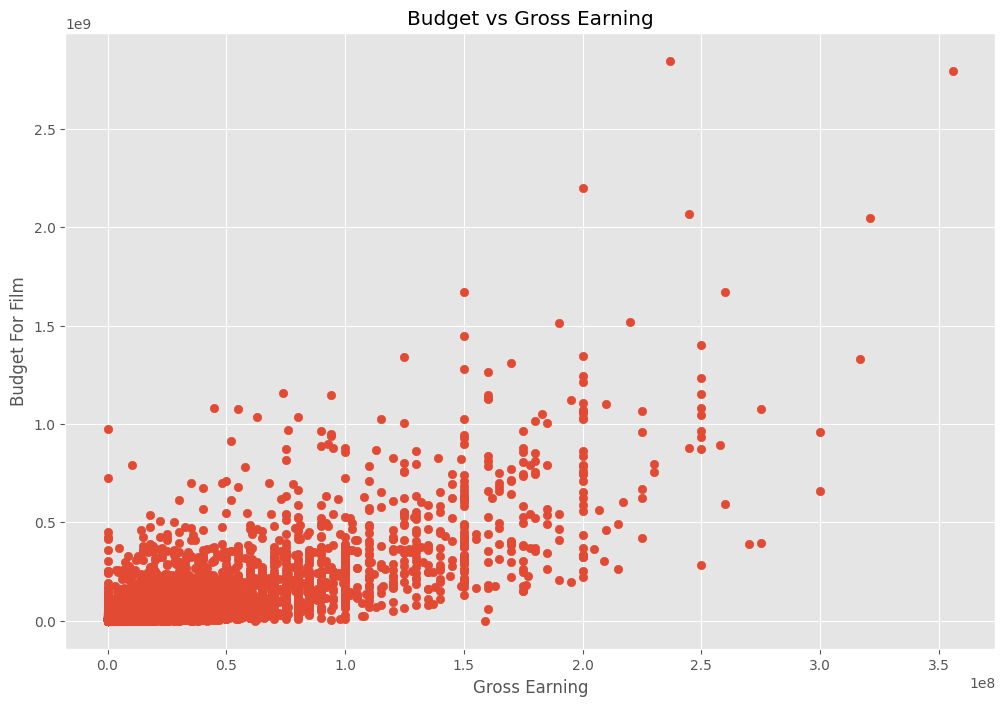

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget For Film')

plt.show

<Axes: xlabel='budget', ylabel='gross'>

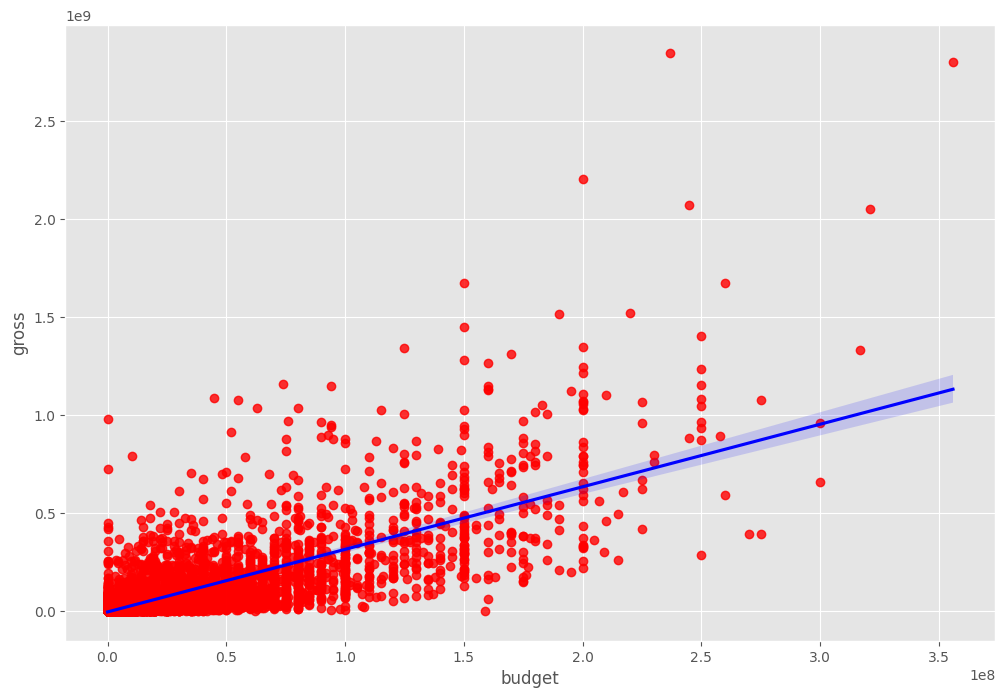

In [ ]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
df.drop('year', axis=1, inplace=True)

In [ ]:
df.corr(method='pearson') #pearson, kendall, spearman

<ipython-input-17-f087c535a3f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


,score,votes,budget,gross,runtime,year corrected
score,1.000000,0.409182,0.055665,0.186392,0.399451,0.105994
votes,0.409182,1.000000,0.486862,0.632834,0.309212,0.218429
budget,0.055665,0.486862,1.000000,0.750157,0.269510,0.300066
gross,0.186392,0.632834,0.750157,1.000000,0.245235,0.255026
runtime,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
year corrected,0.105994,0.218429,0.300066,0.255026,0.120636,1.000000


<ipython-input-18-1a0d8fdff58b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


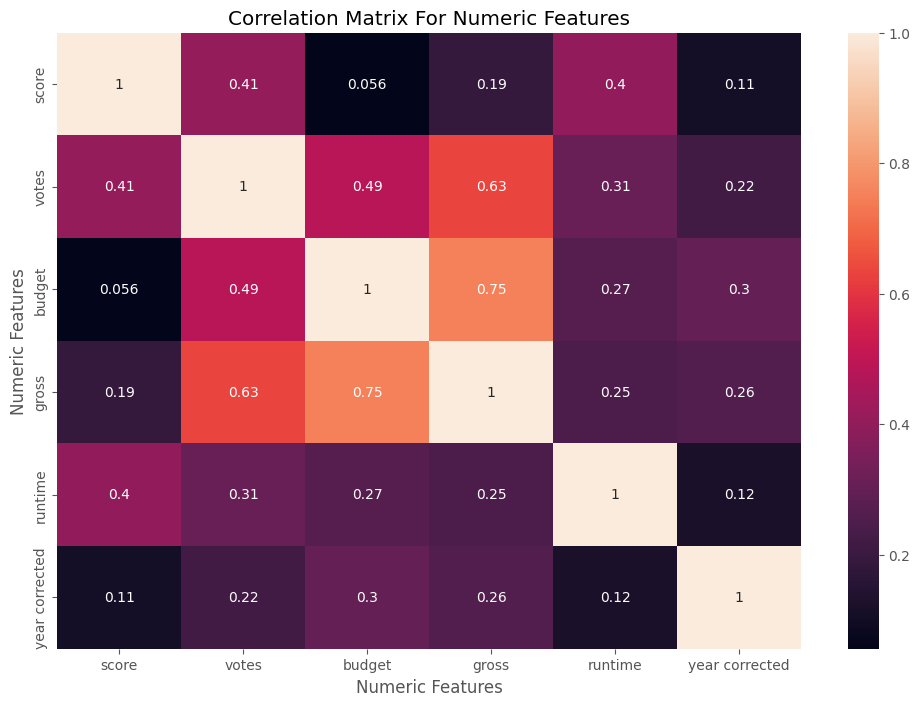

In [ ]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Numeric Features')
plt.ylabel('Numeric Features')

plt.show()

In [30]:
df_numerized = df

for col_name in df_numerized.columns:
  if (df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year corrected
0,6587,6,6,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1980.0
1,5573,6,1,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1980.0
2,5142,4,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1980.0
3,286,4,4,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1980.0
4,1027,6,4,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1980.0


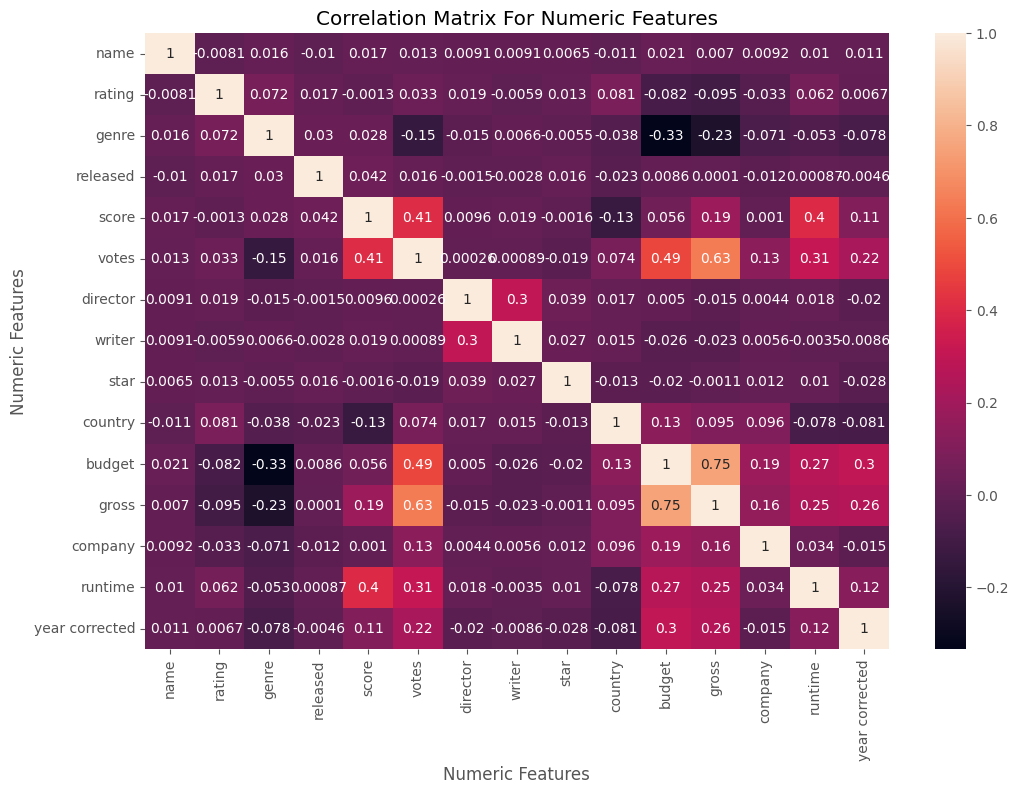

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Numeric Features')
plt.ylabel('Numeric Features')

plt.show()

In [31]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      released   -0.010480
      score       0.017097
dtype: float64

In [32]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
votes   genre    -0.145307
dtype: float64

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross           votes             0.632834
votes           gross             0.632834
budget          gross             0.750157
gross           budget            0.750157
name            name              1.000000
writer          writer            1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year corrected  year corrected    1.000000
dtype: float64